# Exploratory Data Analysis
## Team 10
### 221AI012 221AI032
#### Notebook Link: https://colab.research.google.com/drive/1n-rUdNOVg8C5mZN8W8de7_Q1KbjFhqR9?usp=sharing

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vivekprajapati2048/medical-segmentation-decathlon-lung

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


# Loading Data

In [ ]:
!unzip /content/medical-segmentation-decathlon-lung.zip

Archive:  /content/medical-segmentation-decathlon-lung.zip
  inflating: ._dataset.json          
  inflating: ._imagesTr              
  inflating: ._imagesTs              
  inflating: ._labelsTr              
  inflating: dataset.json            
  inflating: imagesTr/lung_001.nii/lung_001.nii  
  inflating: imagesTr/lung_003.nii/lung_003.nii  
  inflating: imagesTr/lung_004.nii/lung_004.nii  
  inflating: imagesTr/lung_005.nii/lung_005.nii  
  inflating: imagesTr/lung_006.nii/lung_006.nii  
  inflating: imagesTr/lung_009.nii/lung_009.nii  
  inflating: imagesTr/lung_010.nii/lung_010.nii  
  inflating: imagesTr/lung_014.nii/lung_014.nii  
  inflating: imagesTr/lung_015.nii/lung_015.nii  
  inflating: imagesTr/lung_016.nii/lung_016.nii  
  inflating: imagesTr/lung_018.nii/lung_018.nii  
  inflating: imagesTr/lung_020.nii/lung_020.nii  
  inflating: imagesTr/lung_022.nii/lung_022.nii  
  inflating: imagesTr/lung_023.nii/lung_023.nii  
  inflating: imagesTr/lung_025.nii/lung_025.nii  
 

In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import nibabel as nib


In [ ]:
!pip install celluloid

In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from tqdm.notebook import tqdm
import cv2
import SimpleITK as sitk

In [ ]:
root = Path("/content/imagesTr")
label = Path("/content/labelsTr/")

In [ ]:
def change_img_to_label_path(path):
    """
    Replaces imagesTr with labelsTr
    """
    parts = list(path.parts)  # get all directories whithin the path
    parts[parts.index("imagesTr")] = "labelsTr"  # Replace imagesTr with labelsTr
    return Path(*parts)  # Combine list back into a Path object



In [ ]:
sample_path = list(root.glob("lung*"))[2]  # Choose a subject
sample_path_label = change_img_to_label_path(sample_path)

In [ ]:
sample_path, sample_path_label

(PosixPath('/content/imagesTr/lung_051.nii'),
 PosixPath('/content/labelsTr/lung_051.nii'))

In [ ]:
train_data = []
test_data = []
labels = []
train_data_1 = glob('/content/imagesTr/*/*')
labels_1 = glob('/content/labelsTr/*/*')

In [ ]:
train_data_1[:5]

['/content/imagesTr/lung_055.nii/lung_055.nii',
 '/content/imagesTr/lung_004.nii/lung_004.nii',
 '/content/imagesTr/lung_051.nii/lung_051.nii',
 '/content/imagesTr/lung_041.nii/lung_041.nii',
 '/content/imagesTr/lung_044.nii/lung_044.nii']

In [ ]:
labels_1[:5]

['/content/labelsTr/lung_055.nii/lung_055.nii',
 '/content/labelsTr/lung_004.nii/lung_004.nii',
 '/content/labelsTr/lung_051.nii/lung_051.nii',
 '/content/labelsTr/lung_041.nii/lung_041.nii',
 '/content/labelsTr/lung_044.nii/lung_044.nii']

In [ ]:
len(train_data_1)

63

In [ ]:
len(labels_1)

63

# Analysing a scan sample

In [ ]:
ct_scan_path = train_data_1[3]
ct_scan = sitk.ReadImage(ct_scan_path)

ct_scan_array = sitk.GetArrayFromImage(ct_scan)
flattened_array = ct_scan_array.flatten()

mean_intensity = np.mean(flattened_array[flattened_array >= 0])
median_intensity = np.median(flattened_array[flattened_array >= 0])
min_intensity = np.min(flattened_array[flattened_array >= 0])
max_intensity = np.max(flattened_array[flattened_array >= 0])
std_dev_intensity = np.std(flattened_array[flattened_array >= 0])

# Results
print("Scan Statistics")
print("Mean intensity:", mean_intensity)
print("Median intensity:", median_intensity)
print("Minimum intensity:", min_intensity)
print("Maximum intensity:", max_intensity)
print("Standard deviation of intensity:", std_dev_intensity)


Mean intensity: -550.21173
Median intensity: -876.0
Minimum intensity: -1024.0
Maximum intensity: 3071.0
Standard deviation of intensity: 515.99585


## Plotting some statistics of the scan voxel intensities

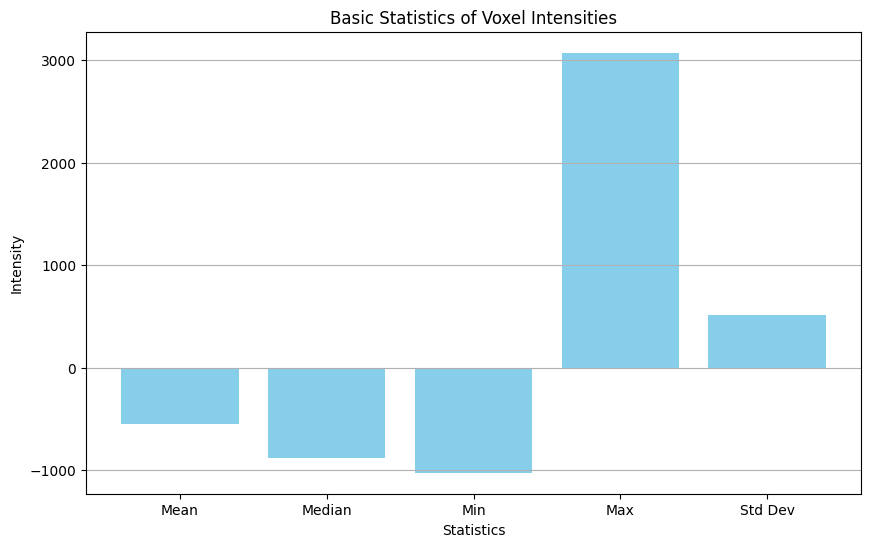

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['Mean', 'Median', 'Min', 'Max', 'Std Dev'], [mean_intensity, median_intensity, min_intensity, max_intensity, std_dev_intensity], color='skyblue')
plt.title('Basic Statistics of Voxel Intensities')
plt.xlabel('Statistics')
plt.ylabel('Intensity')
plt.grid(axis='y')
plt.show()

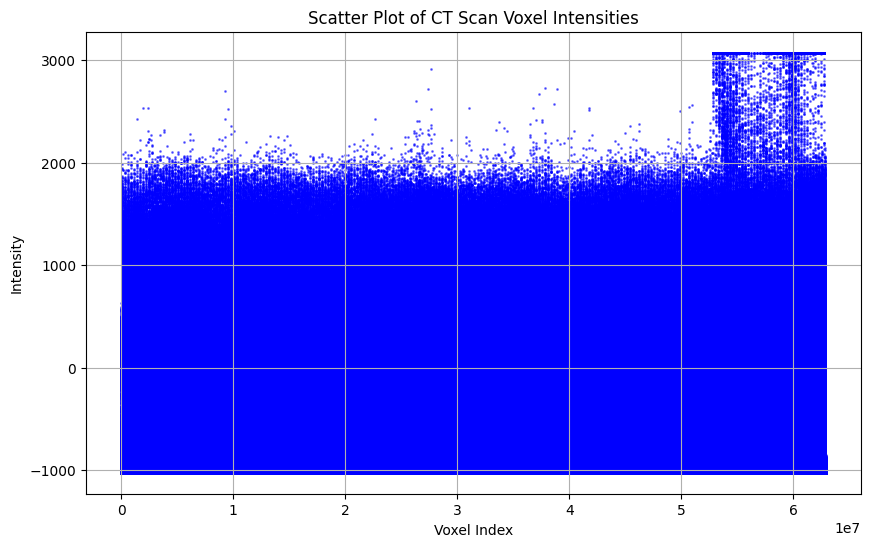

In [ ]:
flattened_indices = np.arange(ct_scan_array.size)
flattened_intensities = flattened_array

# Plot scatter plot of voxel intensities
plt.figure(figsize=(10, 6))
plt.scatter(flattened_indices, flattened_intensities, s=1, c='blue', alpha=0.5)
plt.title('Scatter Plot of CT Scan Voxel Intensities')
plt.xlabel('Voxel Index')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

## Analysing a segmentation mask

In [ ]:
label_scan_path = labels_1[3]
label_scan = sitk.ReadImage(label_scan_path)

label_scan_array = sitk.GetArrayFromImage(label_scan)
label_flattened_array = label_scan_array.flatten()

mean_intensity = np.mean(label_flattened_array)
median_intensity = np.median(label_flattened_array)
min_intensity = np.min(label_flattened_array)
max_intensity = np.max(label_flattened_array)
std_dev_intensity = np.std(label_flattened_array)

# Results
print("Label Statistics")
print("Scan Statistics")
print("Mean intensity:", mean_intensity)
print("Median intensity:", median_intensity)
print("Minimum intensity:", min_intensity)
print("Maximum intensity:", max_intensity)
print("Standard deviation of intensity:", std_dev_intensity)

Label Statistics
Scan Statistics
Mean intensity: 0.0012021700541178385
Median intensity: 0.0
Minimum intensity: 0
Maximum intensity: 1
Standard deviation of intensity: 0.03465147675465849


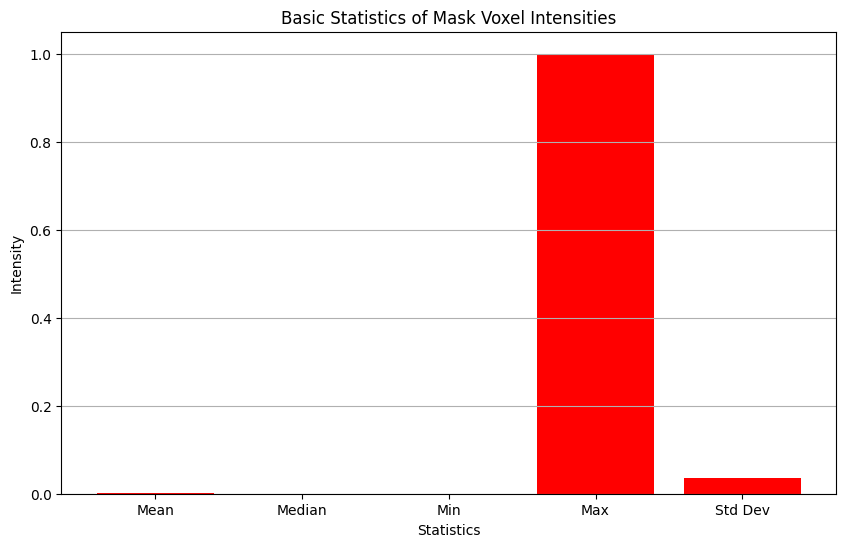

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['Mean', 'Median', 'Min', 'Max', 'Std Dev'], [mean_intensity, median_intensity, min_intensity, max_intensity, std_dev_intensity], color='red')
plt.title('Basic Statistics of Mask Voxel Intensities')
plt.xlabel('Statistics')
plt.ylabel('Intensity')
plt.grid(axis='y')
plt.show()

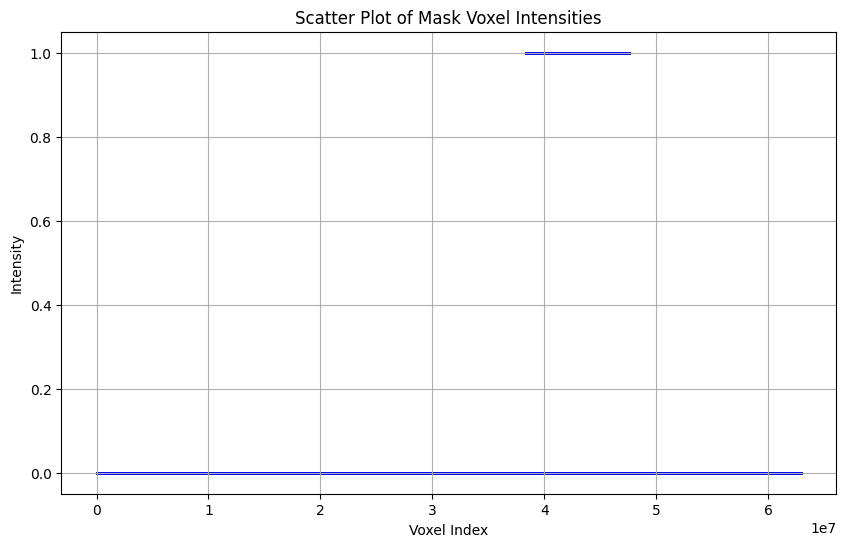

In [ ]:
flattened_indices = np.arange(label_scan_array.size)
flattened_intensities = label_flattened_array

# Plot scatter plot of voxel intensities
plt.figure(figsize=(10, 6))
plt.scatter(flattened_indices, flattened_intensities, s=1, c='blue', alpha=0.5)
plt.title('Scatter Plot of Mask Voxel Intensities')
plt.xlabel('Voxel Index')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

## Viewing slices of a scan

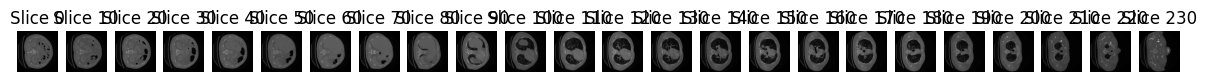

In [ ]:
ct_scan_path = train_data_1[3]
ct_scan = nib.load(ct_scan_path)
ct_scan_array = ct_scan.get_fdata()

slice_indices = range(0, ct_scan_array.shape[2], 10)

# Plot the individual slices
fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))

for i, slice_idx in enumerate(slice_indices):
    ax = axes[i] if len(slice_indices) > 1 else axes
    ax.imshow(ct_scan_array[:, :, slice_idx], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Slice {slice_idx}")

plt.show()

In [ ]:
ct_scan_array.shape

(512, 512, 240)

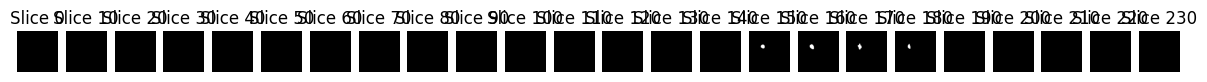

In [ ]:
label_scan_path = labels_1[3]
label_scan = nib.load(label_scan_path)
label_scan_array = label_scan.get_fdata()

slice_indices = range(0, label_scan_array.shape[2], 10)

# Plot the individual slices
fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))

for i, slice_idx in enumerate(slice_indices):
    ax = axes[i] if len(slice_indices) > 1 else axes
    ax.imshow(label_scan_array[:, :, slice_idx], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Slice {slice_idx}")

plt.show()

In [ ]:
label_scan_array.shape

(512, 512, 240)

# Plotting the intensities of each voxel

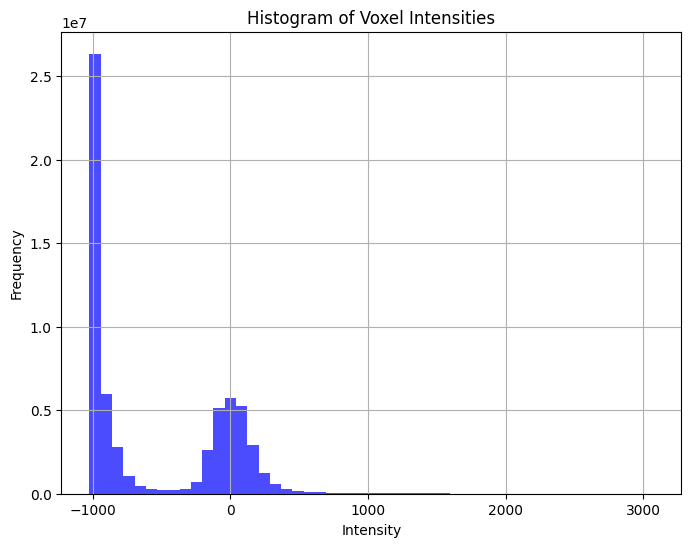

In [ ]:
flattened_array = ct_scan_array.flatten()

# Plot histogram of voxel intensities
plt.figure(figsize=(8, 6))
plt.hist(flattened_array, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Voxel Intensities')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

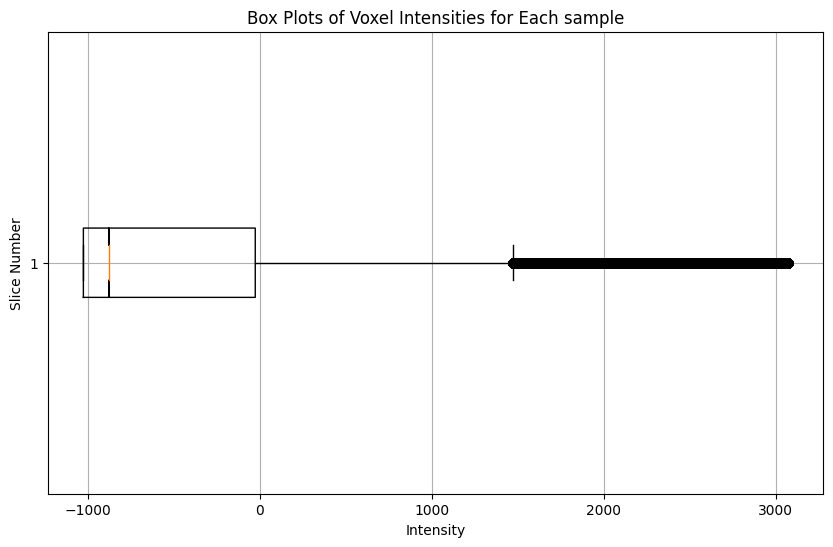

In [ ]:
reshaped_array = flattened_array

# Plot box plots of voxel intensities for each slice
plt.figure(figsize=(10, 6))
plt.boxplot(reshaped_array, notch=True, vert=False)
plt.title('Box Plot of Voxel Intensities for Each sample')
plt.xlabel('Intensity')
plt.ylabel('Slice Number')
plt.grid(True)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes

## Reconstructing the 3d scans using skimage

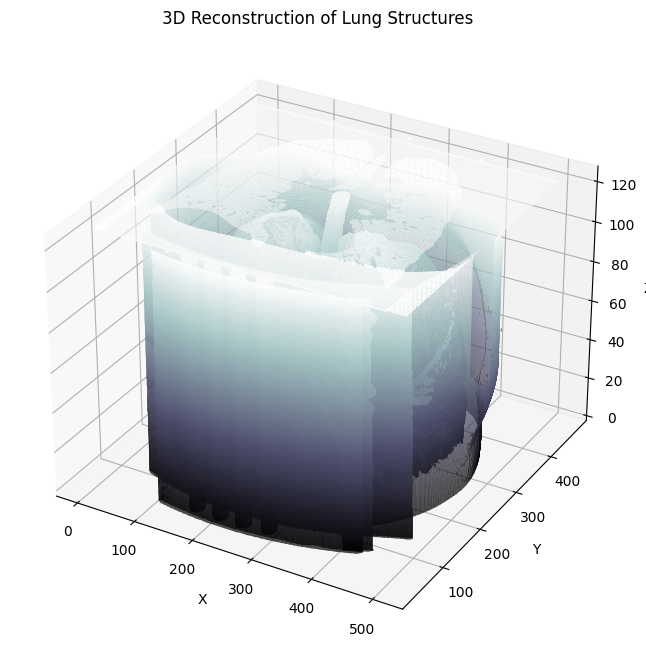

In [ ]:
threshold = np.min(ct_scan_array) + (np.max(ct_scan_array) - np.min(ct_scan_array)) * 0.1  # for example, 10% of the intensity range
lung_mask = ct_scan_array > threshold

# Perform marching cubes algorithm to extract the lung surface
vertices, faces, _, _ = marching_cubes(lung_mask, level=0, spacing=(1.0, 1.0, 1.0))

# Plot the 3D reconstruction
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], faces, vertices[:, 2], cmap='bone')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Reconstruction of Lung Structures')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Viewing a scan and mask overlay

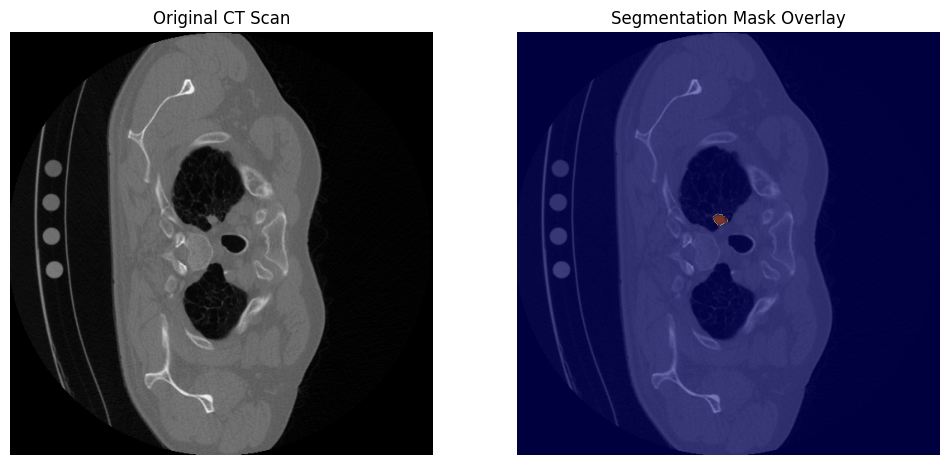

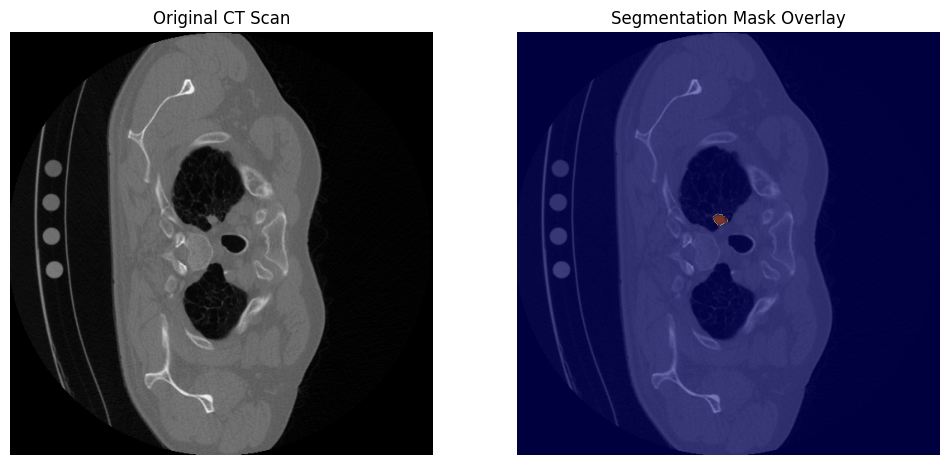

In [ ]:
segmentation_mask_path = labels_1[3]
segmentation_mask = nib.load(segmentation_mask_path)

# Get the segmentation mask data array
segmentation_mask_array = segmentation_mask.get_fdata()

# Choose the slice index you want to visualize
slice_index = 110  # for example

# Plot the original CT scan slice
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ct_scan_array[:, :, slice_index], cmap='gray')
plt.title('Original CT Scan')
plt.axis('off')

# Plot the segmentation mask overlay
plt.subplot(1, 2, 2)
plt.imshow(ct_scan_array[:, :, slice_index], cmap='gray')
plt.imshow(segmentation_mask_array[:, :, slice_index], cmap='jet', alpha=0.5)  # Overlay with transparency
plt.title('Segmentation Mask Overlay')
plt.axis('off')

plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
data = nib.load(train_data_1[3])
label = nib.load(labels_1[3])

ct = data.get_fdata()
mask = label.get_fdata()

In [ ]:
nib.aff2axcodes(data.affine)

('L', 'A', 'S')

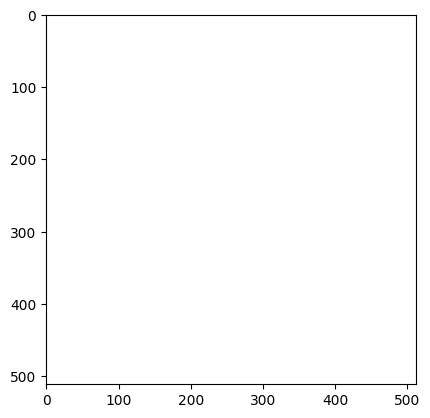

In [ ]:
# Inspect the loaded data with overlaid Ground Truth tumor segmentation using axial view
fig = plt.figure()
camera = Camera(fig)  # create the camera object from celluloid

for i in range(0, ct.shape[2], 2):  # axial view
    plt.imshow(ct[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    plt.imshow(mask_, alpha=0.5, cmap="autumn")
    #plt.axis("off")
    camera.snap()  # Store the current slice
animation = camera.animate()  # create the animation

## Animated view of the slices with the segmentation masks overlayed

In [ ]:

from IPython.display import HTML
HTML(animation.to_html5_video())